In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [626]:
payments_df = pd.read_csv('../data/payments.csv')
payments_df.head()

,payment_date,Payment_types,real_cost,account_id
0,2021-01-01 00:00:56,Payment_system_5,9.650000,2907221
1,2021-01-01 00:01:48,Payment_system_5,0.955872,3228373
2,2021-01-01 00:03:42,Payment_system_5,3.026930,318552
3,2021-01-01 00:04:27,Payment_system_2,99.990000,3832817
4,2021-01-01 00:06:41,Payment_system_5,1.432550,7229767


In [627]:
payments_df['payment_date'] = pd.to_datetime(payments_df['payment_date'])
payments_df.dtypes

payment_date     datetime64[ns]
Payment_types            object
real_cost               float64
account_id                int64
dtype: object

In [628]:
persents_df = pd.read_csv('../data/persents.csv',index_col=0)
persents_df.head()

,Payment_types,"Share, %"
0,Payment_system_1,20.7
1,Payment_system_2,15.0
2,Payment_system_3,58.5
3,Payment_system_4,0.0
4,Payment_system_5,24.0


In [629]:
registrations_df = pd.read_csv('../data/registrations.csv',index_col=0)
registrations_df.head()

,account_id,created_date,campaign
0,3842380.0,2021-01-01,BRA_MS1_install
1,3842381.0,2021-01-01,NaN
2,3842382.0,2021-01-01,NaN
3,3842383.0,2021-01-01,NaN
4,3842384.0,2021-01-01,BRA_MS1_install


In [630]:
registrations_df[registrations_df['account_id'].isna()]

,account_id,created_date,campaign
52737,NaN,2021-01-17,NaN
76130,NaN,2021-01-26,NaN
78464,NaN,2021-01-27,NaN


In [631]:
registrations_df.dropna(inplace=True,subset=["account_id"])

In [632]:
registrations_df['account_id'] = registrations_df['account_id'].astype(np.int64)
registrations_df['created_date'] = pd.to_datetime(registrations_df['created_date'])
registrations_df.dtypes

account_id               int64
created_date    datetime64[ns]
campaign                object
dtype: object

In [633]:
registrations_df.campaign.value_counts()

campaign
RUS_MS1_install      12649
BRA_MS1_install      11462
UKR_MS1_install       6790
PR_youtube_bloger     1814
RUS_MS1_purchase      1581
BRA_MS1_purchase      1139
ENG_MS2_install        407
UKR_MS1_purchase       260
BRA_MS2_install        152
our_fb                  29
Name: count, dtype: int64

In [634]:
xls = pd.read_excel('../data/Рекламный бюджет январь 2021.xlsx')

In [635]:
xls_df = xls.drop(axis="rows",index =8)
xls_df['media_source'] = xls_df['media_source'].ffill()

In [636]:
xls_df['media_source'] = xls_df['media_source'].apply(
    lambda x: "".join(
        [letter[0].upper() for letter in x.split('_')]
    )
)

xls_df['Target'] = xls_df['Target'].apply(lambda x: x[:3].upper())
xls_df['campaign'] = xls_df["Target"] + "_" + xls_df["media_source"] + "_" + xls_df["Campaign_type"]
xls_df['CPI'] = xls_df["Spend, USD"] / xls_df["Installs"]
xls_df

,media_source,Campaign_type,Target,"Plan, USD",Installs,"Spend, USD","Deviation, USD",campaign,CPI
0,MS1,install,BRA,100,10460,99.12,0.88,BRA_MS1_install,0.009476
1,MS1,purchase,BRA,400,1081,398.67,1.33,BRA_MS1_purchase,0.368797
2,MS1,install,RUS,200,11894,246.30,-46.30,RUS_MS1_install,0.020708
3,MS1,purchase,RUS,500,1441,616.77,-116.77,RUS_MS1_purchase,0.428015
4,MS1,install,UKR,100,6424,99.43,0.57,UKR_MS1_install,0.015478
5,MS1,purchase,UKR,500,242,348.13,151.87,UKR_MS1_purchase,1.438554
6,MS2,install,BRA,100,152,81.15,18.85,BRA_MS2_install,0.533882
7,MS2,install,ENG,100,371,99.95,0.05,ENG_MS2_install,0.269407


In [637]:
registrations_df['campaign'].value_counts()

campaign
RUS_MS1_install      12649
BRA_MS1_install      11462
UKR_MS1_install       6790
PR_youtube_bloger     1814
RUS_MS1_purchase      1581
BRA_MS1_purchase      1139
ENG_MS2_install        407
UKR_MS1_purchase       260
BRA_MS2_install        152
our_fb                  29
Name: count, dtype: int64

In [638]:
registrations_df[registrations_df['campaign'].isna()].count()

account_id      52858
created_date    52858
campaign            0
dtype: int64

## Помечаем все пустые значения и компании, которые нас не интерисуют как 'other'

In [639]:
registrations_df.loc[~registrations_df['campaign'].isin(xls_df['campaign']), 'campaign'] = "other"
registrations_df = registrations_df[registrations_df['created_date']< '2021-02-01']
registrations_df['campaign'].value_counts()

campaign
other               54701
RUS_MS1_install     12649
BRA_MS1_install     11462
UKR_MS1_install      6790
RUS_MS1_purchase     1581
BRA_MS1_purchase     1139
ENG_MS2_install       407
UKR_MS1_purchase      260
BRA_MS2_install       152
Name: count, dtype: int64

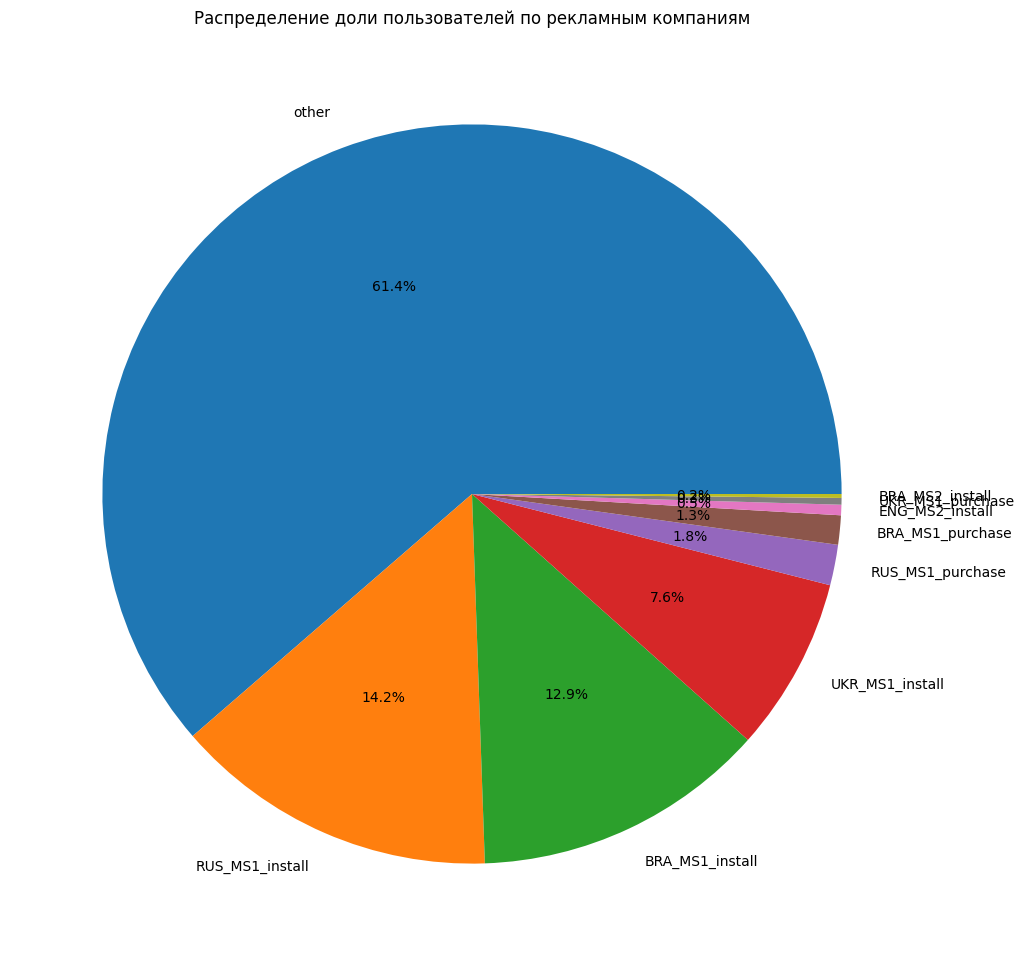

In [641]:
campaign_counts = registrations_df['campaign'].value_counts()
plt.figure(figsize=(20, 12))
plt.pie(campaign_counts, labels=campaign_counts.index, autopct='%1.1f%%')
plt.title('Распределение доли пользователей по рекламным компаниям')
plt.show()

In [642]:
distribution_df = registrations_df[registrations_df['campaign'] != "other"]
distribution_df['campaign'].value_counts()

campaign
RUS_MS1_install     12649
BRA_MS1_install     11462
UKR_MS1_install      6790
RUS_MS1_purchase     1581
BRA_MS1_purchase     1139
ENG_MS2_install       407
UKR_MS1_purchase      260
BRA_MS2_install       152
Name: count, dtype: int64

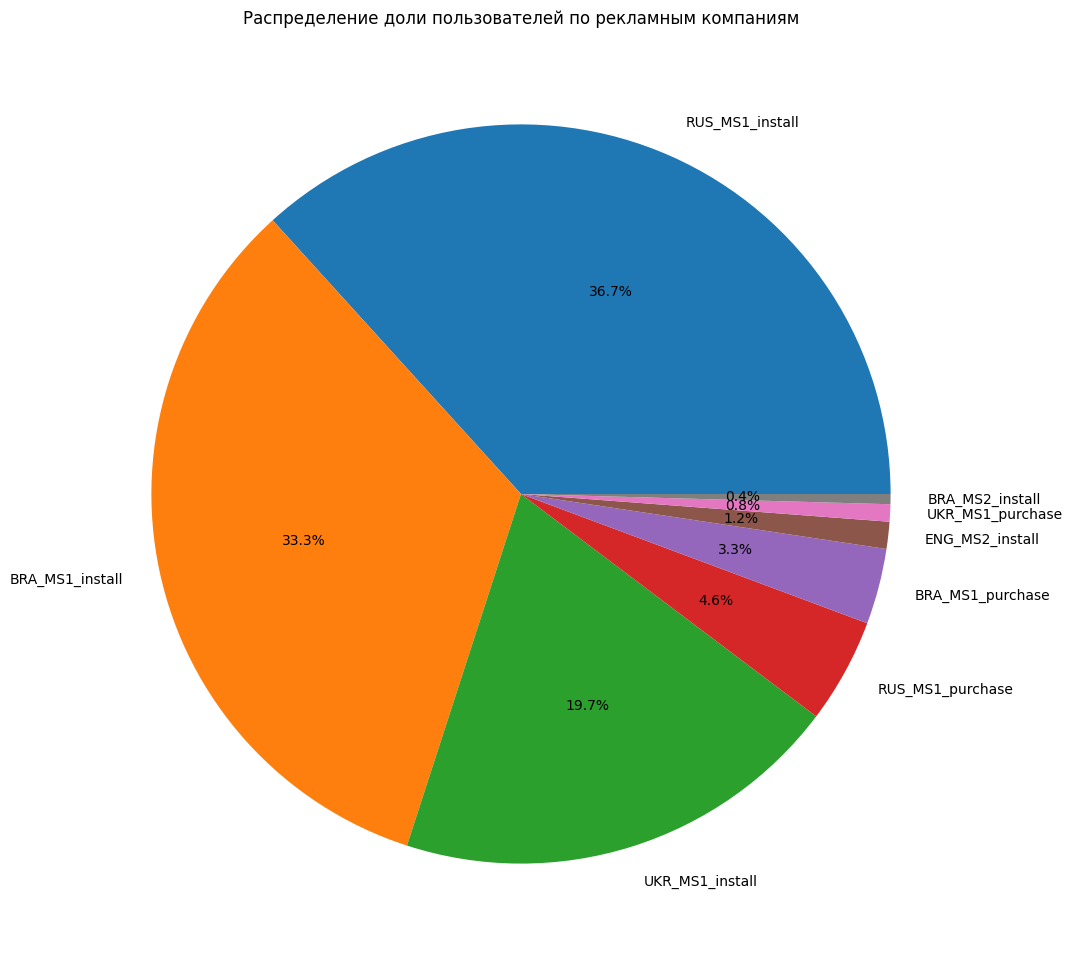

In [643]:
company_distribution_val = distribution_df['campaign'].value_counts()
plt.figure(figsize=(20, 12))
plt.pie(company_distribution_val, labels=company_distribution_val.index, autopct='%1.1f%%')
plt.title('Распределение доли пользователей по рекламным компаниям')
plt.show()

## Убираем компании, которые не принесли убытки

In [644]:
succesfull_df = xls_df[xls_df['Deviation, USD'] > 0]
succesfull_df

,media_source,Campaign_type,Target,"Plan, USD",Installs,"Spend, USD","Deviation, USD",campaign,CPI
0,MS1,install,BRA,100,10460,99.12,0.88,BRA_MS1_install,0.009476
1,MS1,purchase,BRA,400,1081,398.67,1.33,BRA_MS1_purchase,0.368797
4,MS1,install,UKR,100,6424,99.43,0.57,UKR_MS1_install,0.015478
5,MS1,purchase,UKR,500,242,348.13,151.87,UKR_MS1_purchase,1.438554
6,MS2,install,BRA,100,152,81.15,18.85,BRA_MS2_install,0.533882
7,MS2,install,ENG,100,371,99.95,0.05,ENG_MS2_install,0.269407


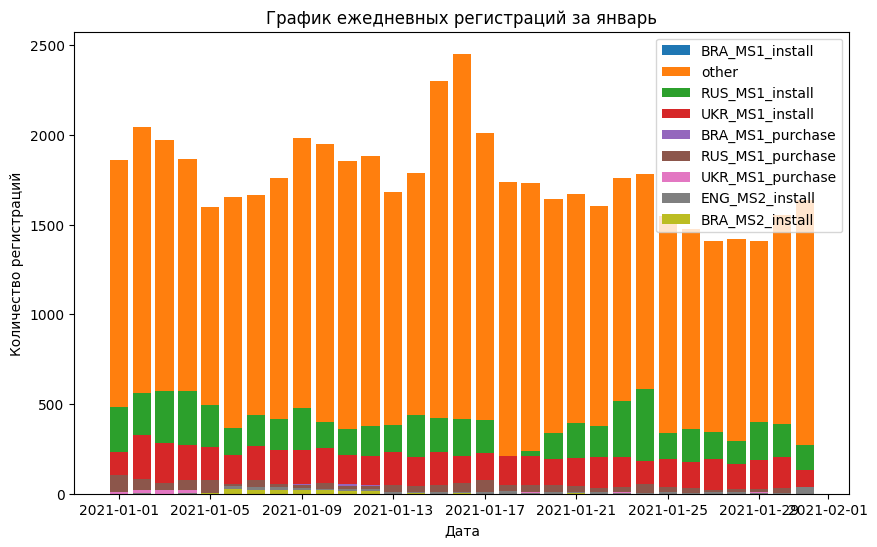

In [640]:
plt.figure(figsize=(10, 6))
for value in registrations_df['campaign'].unique():
    df = registrations_df[registrations_df['campaign'] == value]
    daily_counts = df.groupby(by='created_date')["account_id"].nunique()
    plt.bar(daily_counts.index,daily_counts.values, label=str(value))
    plt.xlabel('Дата')
    plt.ylabel('Количество Установок')
plt.title('График ежедневных установок за январь')
plt.legend()
plt.show()

In [645]:
pp_df = payments_df.merge(persents_df,how='inner')
pp_df['profit'] = pp_df['real_cost'] * pp_df['Share, %'] / 100
pp_df.drop(columns=['Share, %','real_cost','Payment_types'],inplace=True)
pp_df = pp_df.merge(distribution_df,how='inner', on='account_id')
var = pp_df[pp_df['payment_date'] >= pp_df[
    'created_date']]  # избавимся от несуразных данных,где первая покупка была совершена до создания аккаунта
var


,payment_date,account_id,profit,created_date,campaign
2,2021-01-01 17:16:09,3844647,2.309897,2021-01-01,BRA_MS1_install
3,2021-01-01 17:17:45,3844647,2.309897,2021-01-01,BRA_MS1_install
4,2021-01-02 01:08:32,3845613,0.229409,2021-01-02,RUS_MS1_purchase
6,2021-01-02 13:21:20,3843913,0.229409,2021-01-01,RUS_MS1_purchase
8,2021-01-03 16:06:22,3849559,0.230574,2021-01-03,BRA_MS1_purchase
...,...,...,...,...,...
683,2021-12-29 17:14:22,3924840,0.000000,2021-01-29,RUS_MS1_install
684,2021-12-29 18:55:43,3924840,0.000000,2021-01-29,RUS_MS1_install
685,2021-12-29 21:22:10,3924840,0.000000,2021-01-29,RUS_MS1_install
686,2021-12-30 08:15:58,3924840,0.000000,2021-01-29,RUS_MS1_install


## Добавление коэффициента вовлечения аудитории, для последующего оценивания успешности  рекламных компаний

In [646]:
conv_df = var.groupby(by=['account_id','campaign'])['profit'].sum().reset_index()
conv_df['donater'] = conv_df['profit'].apply(lambda x: x != 0)
conv_df = conv_df.drop(columns =['profit','account_id'])
conv_df = company_distribution_val.reset_index().merge(conv_df.groupby('campaign').sum().reset_index(),on='campaign',how='inner')
conv_df['Conversion Rate'] = conv_df['donater'] / conv_df['count']
conv_df.drop(columns=['count','donater'],inplace=True)
conv_df

,campaign,Conversion Rate
0,RUS_MS1_install,0.002530
1,BRA_MS1_install,0.001396
2,UKR_MS1_install,0.001473
3,RUS_MS1_purchase,0.024668
4,BRA_MS1_purchase,0.013169
5,ENG_MS2_install,0.007371
6,UKR_MS1_purchase,0.030769
7,BRA_MS2_install,0.032895


In [647]:
pp_df.drop(['created_date','account_id'],axis=1,inplace=True)
pp_df['payment_date'] = pd.to_datetime(pp_df['payment_date'].dt.strftime('%Y-%m-%d'))
pp_df['users'] = 1

In [648]:
pp_df.sort_values(by='payment_date', ascending=True, inplace=True)
clean_df = pp_df.groupby(['payment_date','campaign'],as_index=False).sum()

In [649]:
pp_df

,payment_date,profit,campaign,users
0,2021-01-01,0.586970,RUS_MS1_purchase,1
1,2021-01-01,0.586970,RUS_MS1_purchase,1
2,2021-01-01,2.309897,BRA_MS1_install,1
3,2021-01-01,2.309897,BRA_MS1_install,1
4,2021-01-02,0.229409,RUS_MS1_purchase,1
...,...,...,...,...
683,2021-12-29,0.000000,RUS_MS1_install,1
684,2021-12-29,0.000000,RUS_MS1_install,1
685,2021-12-29,0.000000,RUS_MS1_install,1
686,2021-12-30,0.000000,RUS_MS1_install,1


In [650]:
grouped = clean_df.groupby(['campaign'])
days = [7,14,30]
arpu_df = pd.DataFrame()
for day in days:
    arpu_df[f'Arpu_{day}'] = grouped.apply(lambda x: x.set_index('payment_date').resample(f'{day}D').sum().mean())['profit'] / grouped['users'].nunique()
arpu_df

,Arpu_7,Arpu_14,Arpu_30
campaign,,,
BRA_MS1_install,0.561041,1.122082,2.431177
BRA_MS1_purchase,1.056547,2.062781,4.331841
BRA_MS2_install,0.086109,0.172218,0.360092
ENG_MS2_install,0.160905,0.309433,0.670439
RUS_MS1_install,0.706175,1.412349,2.824698
RUS_MS1_purchase,0.985771,1.935031,4.018911
UKR_MS1_install,0.226587,0.453173,0.947544
UKR_MS1_purchase,2.049282,4.098563,8.880221


In [651]:
arpu_transposed = arpu_df.transpose()
arpu_transposed

campaign,BRA_MS1_install,BRA_MS1_purchase,BRA_MS2_install,ENG_MS2_install,RUS_MS1_install,RUS_MS1_purchase,UKR_MS1_install,UKR_MS1_purchase
Arpu_7,0.561041,1.056547,0.086109,0.160905,0.706175,0.985771,0.226587,2.049282
Arpu_14,1.122082,2.062781,0.172218,0.309433,1.412349,1.935031,0.453173,4.098563
Arpu_30,2.431177,4.331841,0.360092,0.670439,2.824698,4.018911,0.947544,8.880221


## По графику изменений arpu  с течением времени можно понять, что в среднем рекламные компании направленные на набор новой аудитории почти не меняются с течением времени, а вот компании направленные на продажу косметики или чего-такого в играх, c течением времени только разгоняется, из чего следует вывод, что если рекламная компания с целью набора аудитории за 14 дней не показала особой прибыли (в пределах погрешности), то и спустя 30 дней она ничего не покажет, а вот в случае с purchase компаниями, они наоборот набирают свою критическую массу ближе к 30 дням. 
## Для компаний purchase типа оптимальным сроком оценки окупаемости будет 30 дней, а для компаний типа install 14 дней.

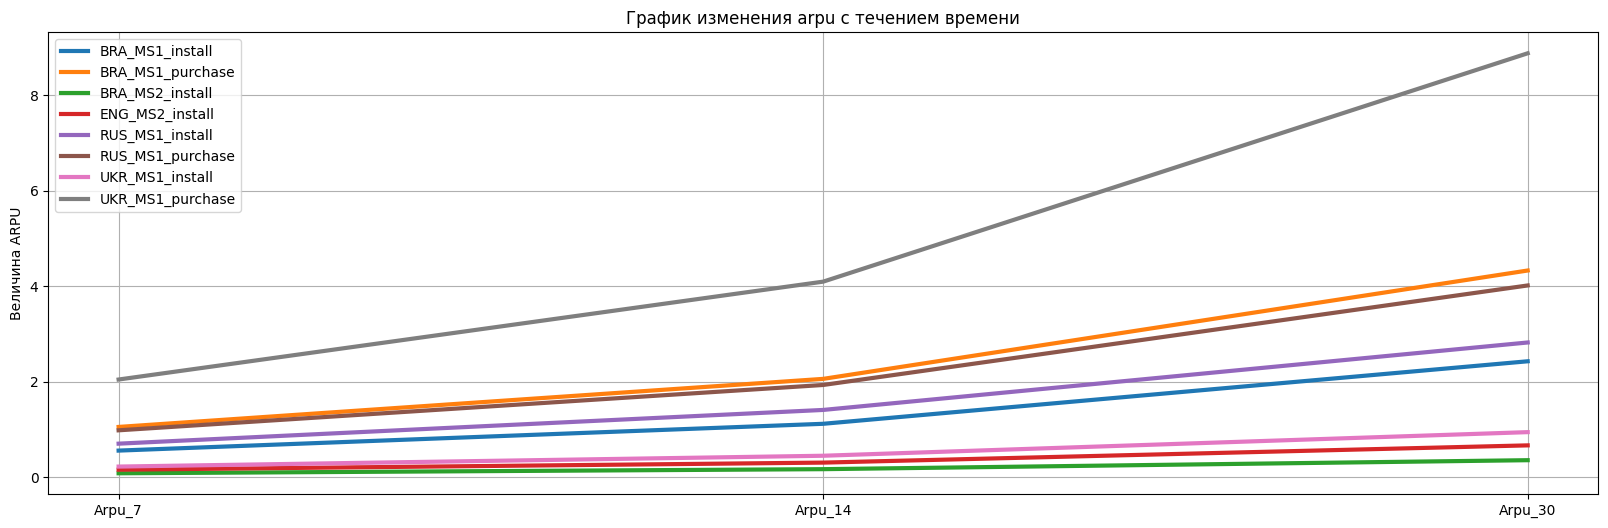

In [652]:
plt.figure(figsize=(20,6))
plt.grid(True)
for col in arpu_transposed.columns:
    plt.plot(arpu_transposed.index,arpu_transposed[col],label=col,linewidth=3)
plt.ylabel('Величина ARPU')
plt.title('График изменения arpu с течением времени')
plt.legend()
plt.show()

In [653]:
xls_df['ROI'] = xls_df['Deviation, USD'] / xls_df['Plan, USD']
xls_df = xls_df.merge(conv_df,how='inner',on='campaign')
xls_df

,media_source,Campaign_type,Target,"Plan, USD",Installs,"Spend, USD","Deviation, USD",campaign,CPI,ROI,Conversion Rate
0,MS1,install,BRA,100,10460,99.12,0.88,BRA_MS1_install,0.009476,0.008800,0.001396
1,MS1,purchase,BRA,400,1081,398.67,1.33,BRA_MS1_purchase,0.368797,0.003325,0.013169
2,MS1,install,RUS,200,11894,246.30,-46.30,RUS_MS1_install,0.020708,-0.231500,0.002530
3,MS1,purchase,RUS,500,1441,616.77,-116.77,RUS_MS1_purchase,0.428015,-0.233540,0.024668
4,MS1,install,UKR,100,6424,99.43,0.57,UKR_MS1_install,0.015478,0.005700,0.001473
5,MS1,purchase,UKR,500,242,348.13,151.87,UKR_MS1_purchase,1.438554,0.303740,0.030769
6,MS2,install,BRA,100,152,81.15,18.85,BRA_MS2_install,0.533882,0.188500,0.032895
7,MS2,install,ENG,100,371,99.95,0.05,ENG_MS2_install,0.269407,0.000500,0.007371


## Если утверждать, что цель рекламных компаний это набор новых игроков при минимальных затратах, то рекламные компании типа install будут намного выгоднее purchase, так как цена одного привлеченного пользователя почти в 5 раз меньше, а средние потери от таких компаний находятся на приемлимом уровне, а затраты на такие компании меньше почти в 4 раза, а следовательно и риски от потерь намного меньше чем от purchase. 

In [654]:
xls_df.groupby(by=['Campaign_type'])[['Installs','ROI','CPI','Conversion Rate']].mean()

,Installs,ROI,CPI,Conversion Rate
Campaign_type,,,,
install,5860.200000,-0.005600,0.169790,0.009133
purchase,921.333333,0.024508,0.745122,0.022869


## По данным таблицы, сложнл сделать вывод, на счет рекламной сети, так как цена за пользователя у них почти одинаковая, а данных по 2 сети явно не хватает для выдвижения, какого либо утверждения, но следует сказать, что за выделенный период MS2 смогла придерживаться установленного бюджетного плана, в то время как MS1 принесла непредвиденные затраты. Также коэфициент вовлечения аудитории выше у MS2

In [655]:
xls_df.groupby(by=['media_source'])[['Installs','ROI','CPI','Conversion Rate']].mean()

,Installs,ROI,CPI,Conversion Rate
media_source,,,,
MS1,5257.0,-0.023913,0.380171,0.012334
MS2,261.5,0.094500,0.401644,0.020133


## Если считать главным критерием для успешной реклдамной компании количество загрузок при минимальных вложениях, то лучшей рекламной компанией явзяется BRA_MS1_install, однако если успешная рекламная компания это та, которая приносит прибыль покрывающую затраты и приносящая прибыль при этом, то такой компанией стала UKR_MS1_pruchase

In [656]:
means_campaign = xls_df.groupby(by=['campaign'])[['Installs','ROI','CPI','Conversion Rate']].mean()
means_campaign.sort_values(by=['CPI','ROI','Conversion Rate'],ascending=[True,False,False],inplace=True)
means_campaign

,Installs,ROI,CPI,Conversion Rate
campaign,,,,
BRA_MS1_install,10460.0,0.008800,0.009476,0.001396
UKR_MS1_install,6424.0,0.005700,0.015478,0.001473
RUS_MS1_install,11894.0,-0.231500,0.020708,0.002530
ENG_MS2_install,371.0,0.000500,0.269407,0.007371
BRA_MS1_purchase,1081.0,0.003325,0.368797,0.013169
RUS_MS1_purchase,1441.0,-0.233540,0.428015,0.024668
BRA_MS2_install,152.0,0.188500,0.533882,0.032895
UKR_MS1_purchase,242.0,0.303740,1.438554,0.030769
